In [1]:
# Import additional libraries for visualization
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Define the input variable for robotics obstacle avoidance system
distance_to_obstacles = ctrl.Antecedent(np.arange(0, 101, 1), 'distance_to_obstacles')

In [4]:
# Define the output variable for robot's velocity
robot_velocity = ctrl.Consequent(np.arange(0, 101, 1), 'robot_velocity')

In [5]:
# Define fuzzy membership functions for distance to obstacles
# Very Close: trapezoidal function from 0 to 30 (very close to obstacles)
distance_to_obstacles['very_close'] = fuzz.trapmf(distance_to_obstacles.universe, [0, 0, 15, 30])
# Close: triangular function from 20 to 50 (close to obstacles)
distance_to_obstacles['close'] = fuzz.trimf(distance_to_obstacles.universe, [20, 35, 50])
# Far: trapezoidal function from 40 to 100 (far from obstacles)
distance_to_obstacles['far'] = fuzz.trapmf(distance_to_obstacles.universe, [40, 60, 100, 100])

In [6]:
# Define fuzzy membership functions for robot's velocity
# Stop: trapezoidal function for stopping (0 to 15)
robot_velocity['stop'] = fuzz.trapmf(robot_velocity.universe, [0, 0, 5, 15])
# Slow: triangular function for slow velocity (10 to 35)
robot_velocity['slow'] = fuzz.trimf(robot_velocity.universe, [10, 22, 35])
# Normal: triangular function for normal velocity (25 to 55)
robot_velocity['normal'] = fuzz.trimf(robot_velocity.universe, [25, 40, 55])
# Fast: trapezoidal function for fast velocity (45 to 100)
robot_velocity['fast'] = fuzz.trapmf(robot_velocity.universe, [45, 65, 100, 100])

In [7]:
# Define the fuzzy rules for robotics obstacle avoidance system
# Rule 1: If distance to obstacles is very close, then robot velocity is stop
rule1 = ctrl.Rule(distance_to_obstacles['very_close'], robot_velocity['stop'])

# Rule 2: If distance to obstacles is close, then robot velocity is slow
rule2 = ctrl.Rule(distance_to_obstacles['close'], robot_velocity['slow'])

# Rule 3: If distance to obstacles is far, then robot velocity is fast
rule3 = ctrl.Rule(distance_to_obstacles['far'], robot_velocity['fast'])

# Create the control system with the rules
robotics_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [8]:
# Create a simulation for the robotics obstacle avoidance system
robotics_simulation = ctrl.ControlSystemSimulation(robotics_ctrl)

In [9]:
# Test Case 1: Very close to obstacles (value = 10)
robotics_simulation.input['distance_to_obstacles'] = 10

In [10]:
# Compute the robot velocity
robotics_simulation.compute()

In [11]:
# Display the result
distance_value = 10
print(f"Distance to Obstacles: {distance_value} (Very Close)")
print(f"Recommended Robot Velocity: {robotics_simulation.output['robot_velocity']:.2f}%")

Distance to Obstacles: 10 (Very Close)
Recommended Robot Velocity: 5.42%


/home/krishom/College/AI-ML/Labs/.venv/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


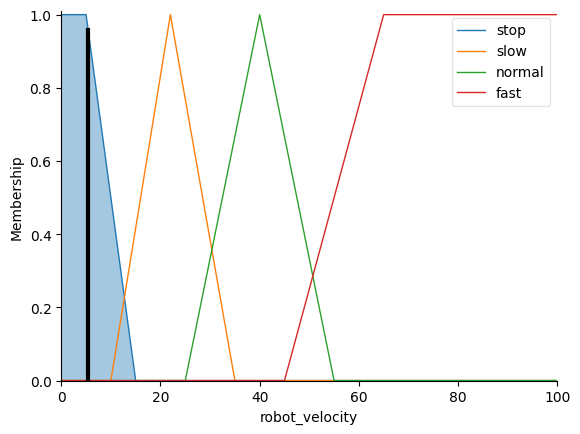

In [12]:
# Visualize the robot velocity output
robot_velocity.view(sim=robotics_simulation)

In [13]:
# Test Case 2: Far from obstacles (value = 80)
robotics_simulation.input['distance_to_obstacles'] = 80

In [14]:
# Compute the robot velocity
robotics_simulation.compute()

# Display the result
print(f"Distance to Obstacles: 80 (Far)")
print(f"Recommended Robot Velocity: {robotics_simulation.output['robot_velocity']:.2f}%")

Distance to Obstacles: 80 (Far)
Recommended Robot Velocity: 77.13%


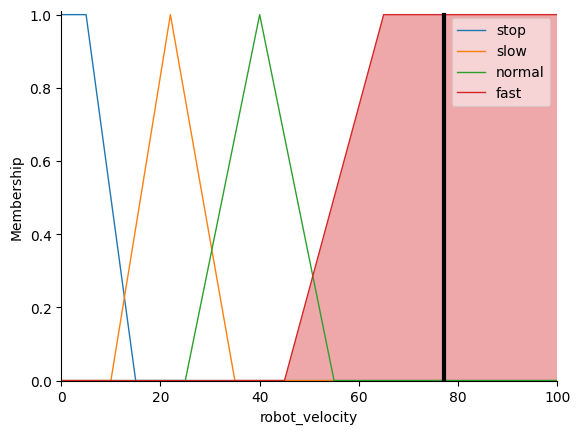

In [15]:
# Visualize the robot velocity output
robot_velocity.view(sim=robotics_simulation)

In [16]:
# Test Case 3: Close to obstacles (value = 35 - between very close and far)
robotics_simulation.input['distance_to_obstacles'] = 35

In [17]:
# Compute the robot velocity
robotics_simulation.compute()

# Display the result
print(f"Distance to Obstacles: 35 (Close)")
print(f"Recommended Robot Velocity: {robotics_simulation.output['robot_velocity']:.2f}%")

Distance to Obstacles: 35 (Close)
Recommended Robot Velocity: 22.33%


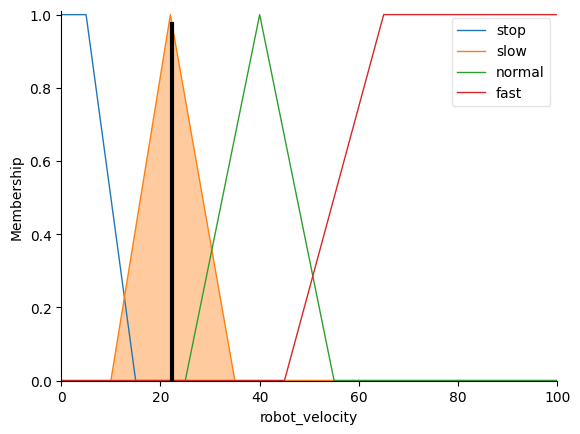

In [18]:
# Visualize the robot velocity output
robot_velocity.view(sim=robotics_simulation)

In [19]:
# Show all outputs for verification
print("All simulation outputs:", robotics_simulation.output)

All simulation outputs: {'robot_velocity': np.float64(22.33333333333333)}


In [20]:
# Test Case 4: Very close to obstacles (value = 5)
robotics_simulation.input['distance_to_obstacles'] = 5

In [21]:
# Compute the robot velocity
robotics_simulation.compute()

# Display the result
print(f"Distance to Obstacles: 5 (Very Close)")
print(f"Recommended Robot Velocity: {robotics_simulation.output['robot_velocity']:.2f}%")

Distance to Obstacles: 5 (Very Close)
Recommended Robot Velocity: 5.42%


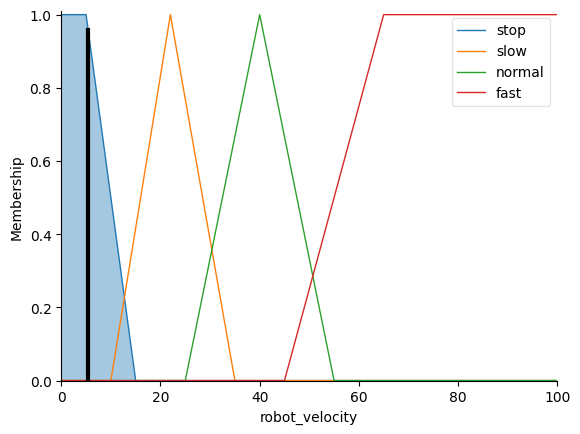

In [22]:
# Visualize the robot velocity output
robot_velocity.view(sim=robotics_simulation)

In [23]:
# Test Case 5: Very far from obstacles (value = 90)
robotics_simulation.input['distance_to_obstacles'] = 90

In [24]:
# Compute the robot velocity
robotics_simulation.compute()

# Display the result  
print(f"Distance to Obstacles: 90 (Very Far)")
print(f"Recommended Robot Velocity: {robotics_simulation.output['robot_velocity']:.2f}%")

Distance to Obstacles: 90 (Very Far)
Recommended Robot Velocity: 77.13%


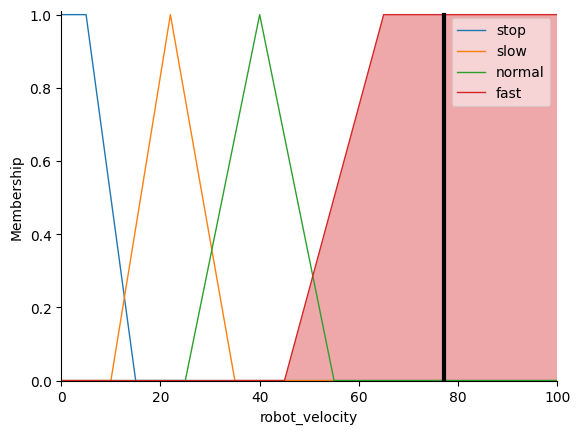

In [25]:
# Visualize the robot velocity output
robot_velocity.view(sim=robotics_simulation)